REPORT MARDOWN

I  chose MORTGAGE30US, T10Y2Y, T10Y3M.


MORTGAGE30US: it's the 30 year fixed rate mortgave average in the US, why I chose it, it's often used to evaluate the overall health of the current economic conditions.

T10Y2Y: it's the yield between 10 year and 2 year US Treasury Bonds. I chose it because it's often use by analyst and policymakers as an insight for future interest rate and economical conditions. Often the inverted yielf curve is a sign of an upcoming recession.

T10Y3M: it's the yielf between the 10 year and the 3 month US Treasury Bonds, same thing as the T10Y2Y. The change in yield here could be an insight into the short-term interest rate, making it interesting if we are looking closely how the market is moving on shorter terms.


FINDINGS:

There seems to have some seasonality in the fixed income sector. 
for the short-term borrowing needs for the US looks like it increases in the first part of the year (my guess here is due to tax season increasing the supply of Treasury Securities)
This increase in supply causes (doesn't have to) the yield to rise, thus becoming more attractive than cash.
End of the year season, around Septmeber/October, the trend seems to switch into equities, this could be explained by the rebalancing of fixed income asset into equities. (based from volume and issuance charts in this analysis below)


With my macro economics data, it would show that we are in a recession that could last a couple years.
The inverted 30 year fixed rate along with an inverted yeild, and high participation in fixed income, especially when we can see that Investment Grade have been increasing for the past 2 years, seeking lower risk and safety among high rated bonds.

What is interesting to see is how crypto is NOT decoupled from traditional market. Even though it has some of its traditional cycle, it definetaly moves along our traditional market and is also affected by market interest rate. 




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def heatmap(table):
    plt.figure(figsize=(10, 10))
    mask = np.triu(np.ones_like(table.corr()))
    heatmap = sns.heatmap(table.corr(), mask=mask, annot=True)
    plt.show()


def plot_dataframe(df, title, x_label, y_label):
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)
    
    # Customize the plot
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def process(path, tab_name, row_to_skip, column_to_skip):
    df = pd.read_excel(path, sheet_name=tab_name, skiprows=row_to_skip)

    # Set the first row as column names and the first column as the index
    df.columns = df.iloc[0]
    df.index = df.iloc[:, 0]

    # Store the index for later use
    index = df.iloc[:, 0]

    # Remove the first row and the first column, and reset the index
    df = df.iloc[1:].reset_index(drop=True)
    df = df.iloc[:, 1:]

    # Set the index to the values from the stored index
    df.index = index.values[1:]

    df = df.iloc[:, :column_to_skip]

    return df

def table(df):
    stats = df.describe(percentiles=[.25, .5, .75])
    stats = stats.transpose()
    selected_columns = ['mean', '25%', '50%', '75%', 'std', 'min', 'max']
    table = stats[selected_columns]
    display(table)
    return table

US TREASURY TRADING VOLUME

In [3]:
path = "sifma/US-Treasury-Securities-Statistics-SIFMA.xlsx"

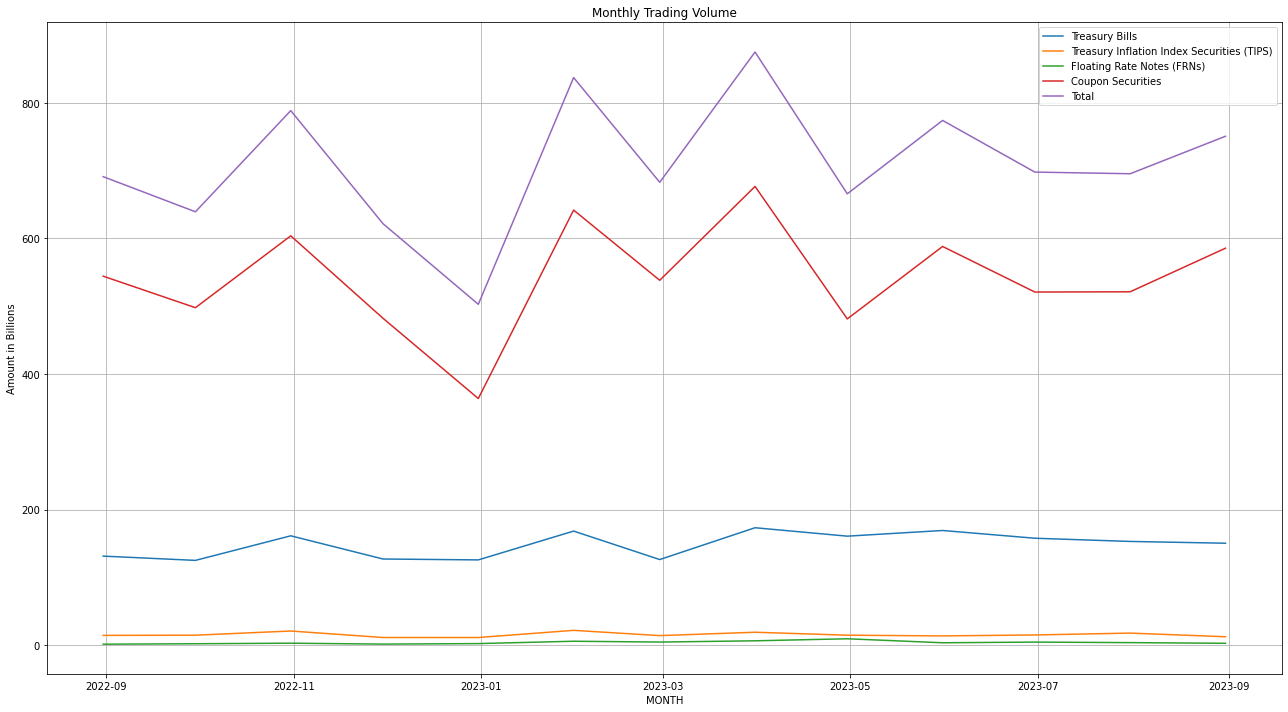

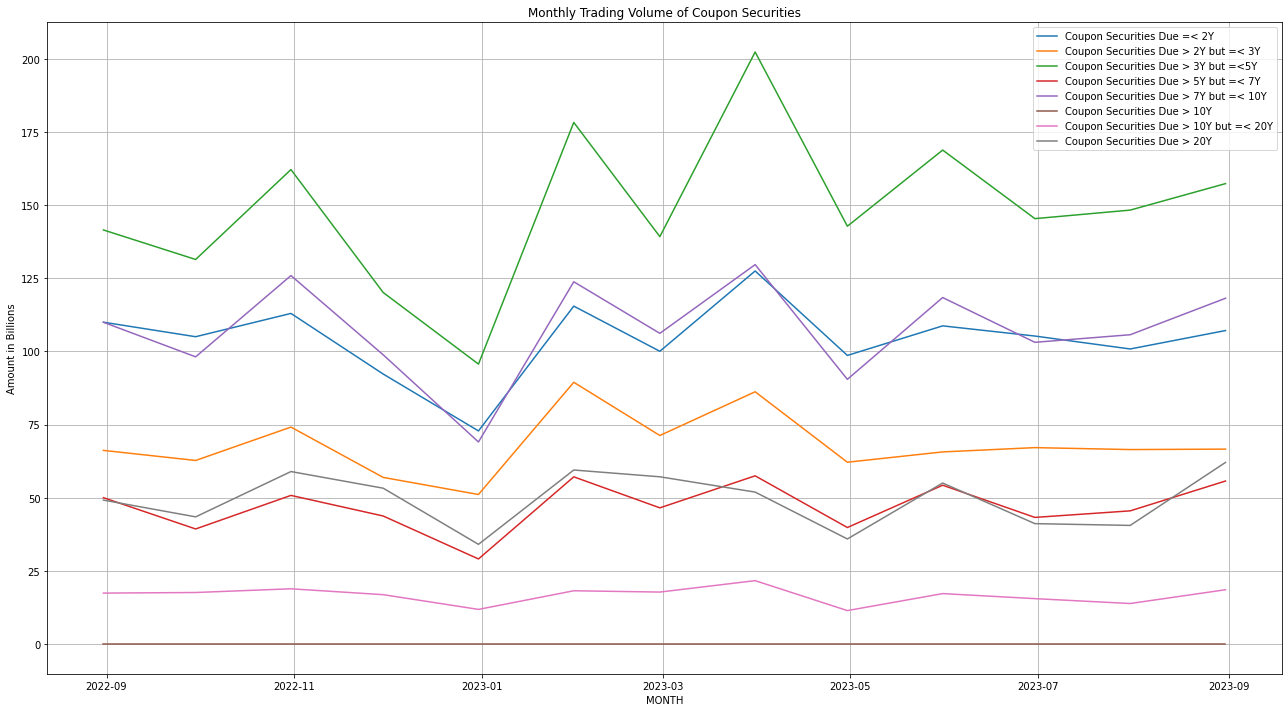

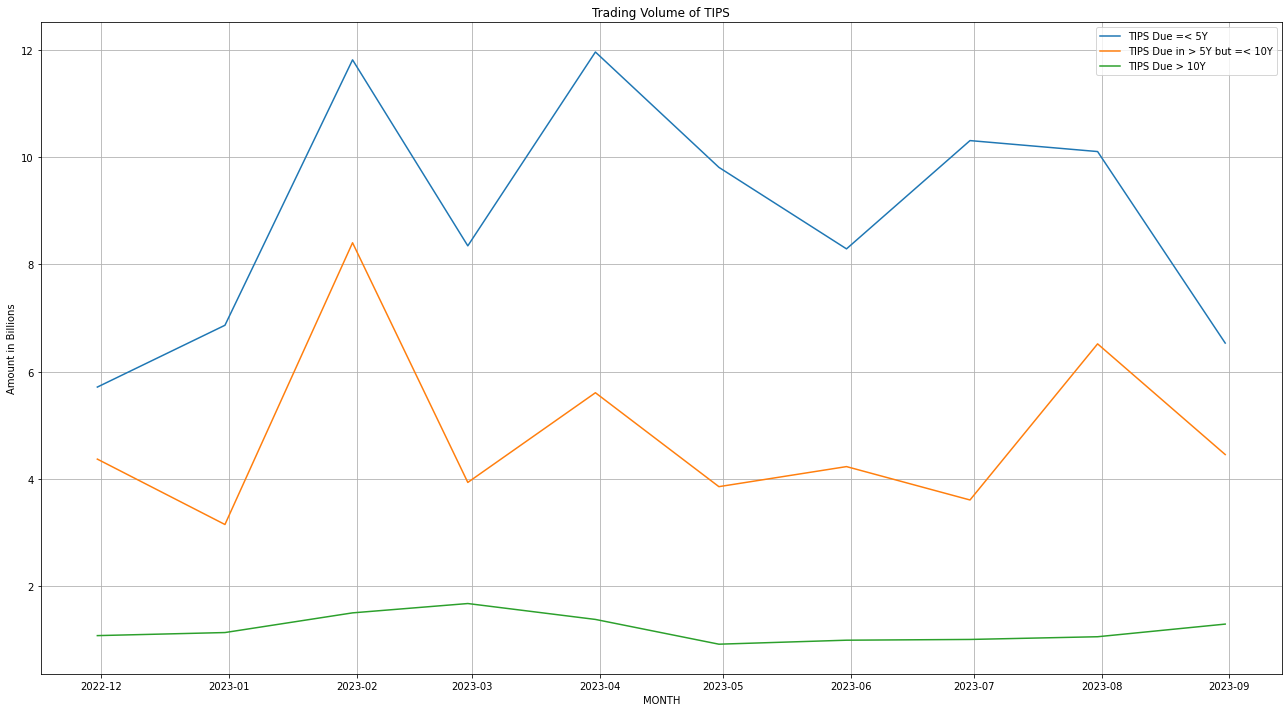

In [4]:
us_treasury = process(path, "Trading Volume", 7, 5)
us_treasury_trading_volume_monthly = us_treasury[25:]
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_trading_volume_monthly,"Monthly Trading Volume","MONTH","Amount in Billions")

us_treasury = process(path, "Trading Volume", 7,14)
us_treasury_coupon_monthly = us_treasury.iloc[25:,6:]
# display(us_treasury)
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_coupon_monthly,"Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

us_treasury = process(path, "Trading Volume", 7,18)
us_treasury_coupon_monthly = us_treasury.iloc[28:,15:]
# display(us_treasury)
plt.figure(figsize=(18, 10))
plot_dataframe(us_treasury_coupon_monthly,"Trading Volume of TIPS","MONTH","Amount in Billions")

US GCF REPO INDEX

In [5]:
path = "sifma/US-Repo-Statistics-SIFMA.xlsx"

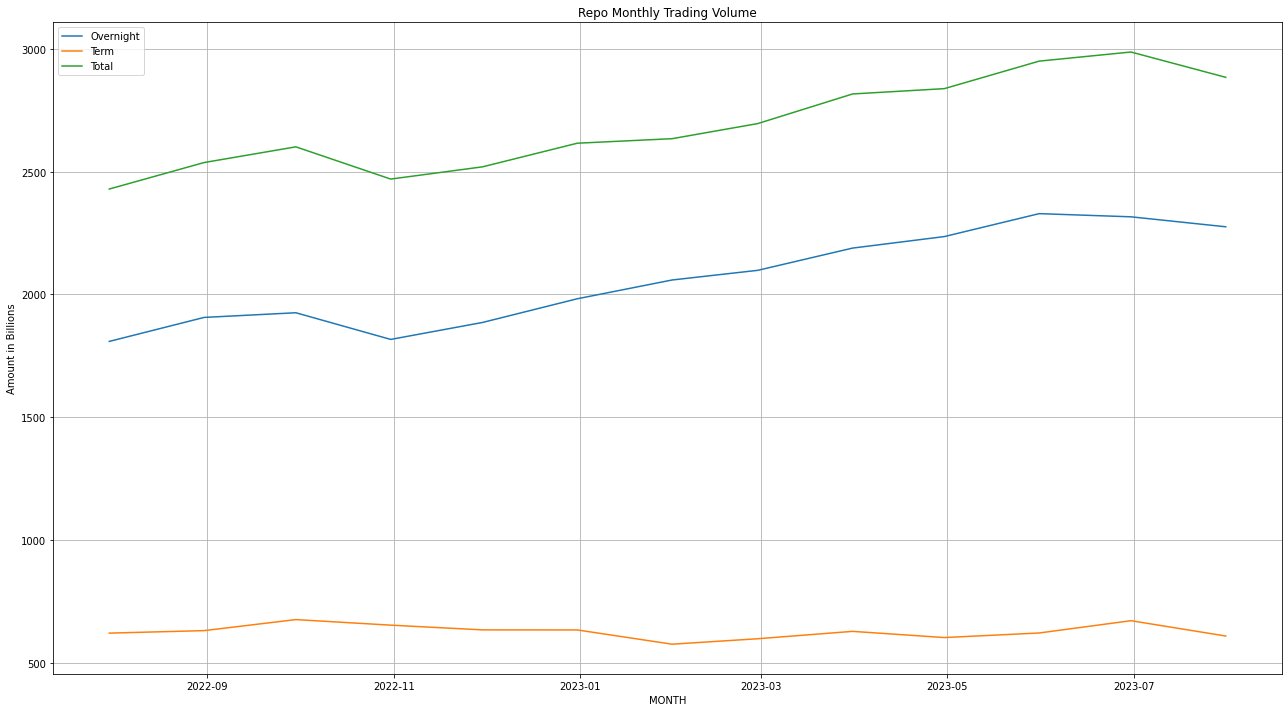

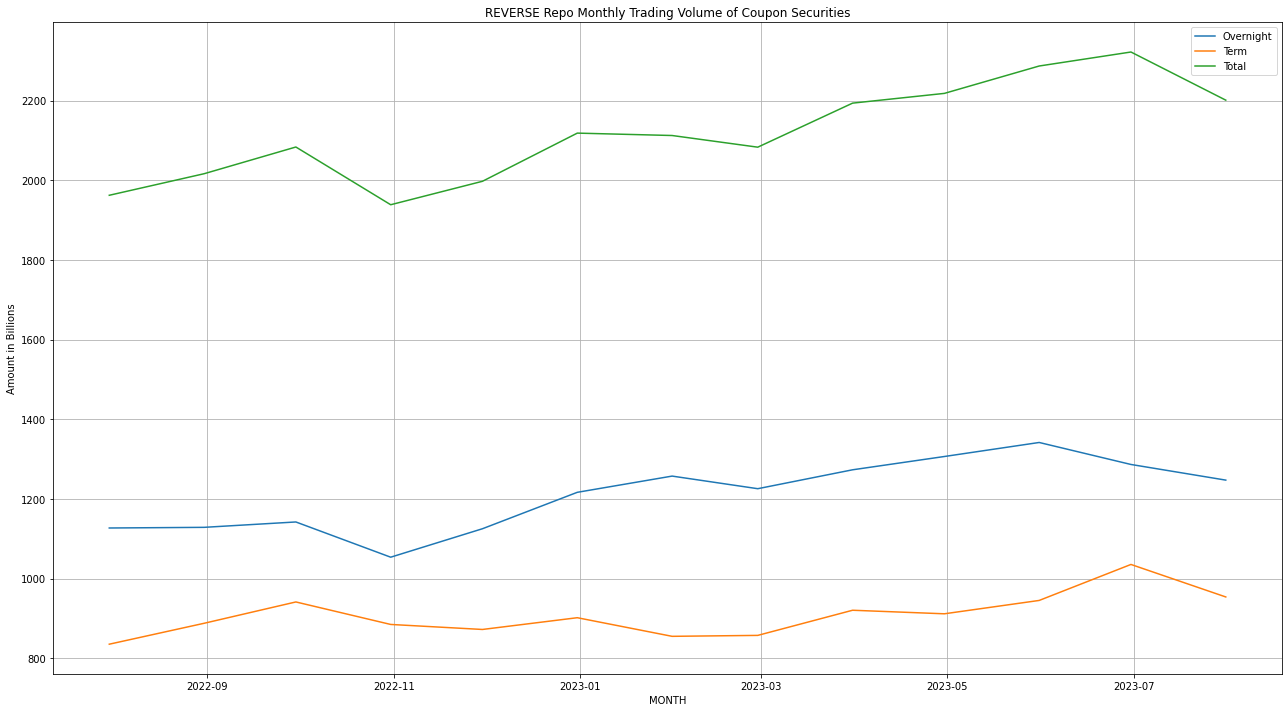

In [6]:
repo = process(path, "Primary Dealer", 7, 3)
repo_monthly = repo[25:]
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"Repo Monthly Trading Volume","MONTH","Amount in Billions")

rev_repo = process(path, "Primary Dealer", 7,7)
rev_repo_monthly = rev_repo.iloc[25:,4:]
plt.figure(figsize=(18, 10))
plot_dataframe(rev_repo_monthly,"REVERSE Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

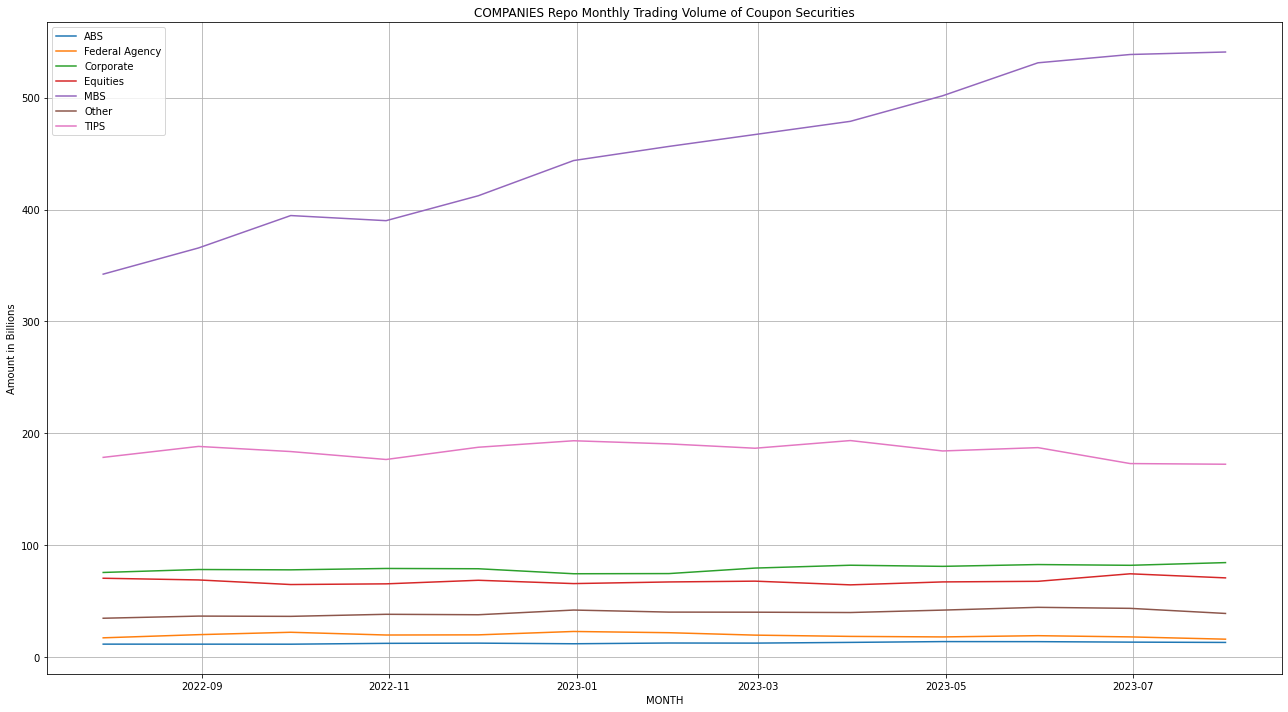

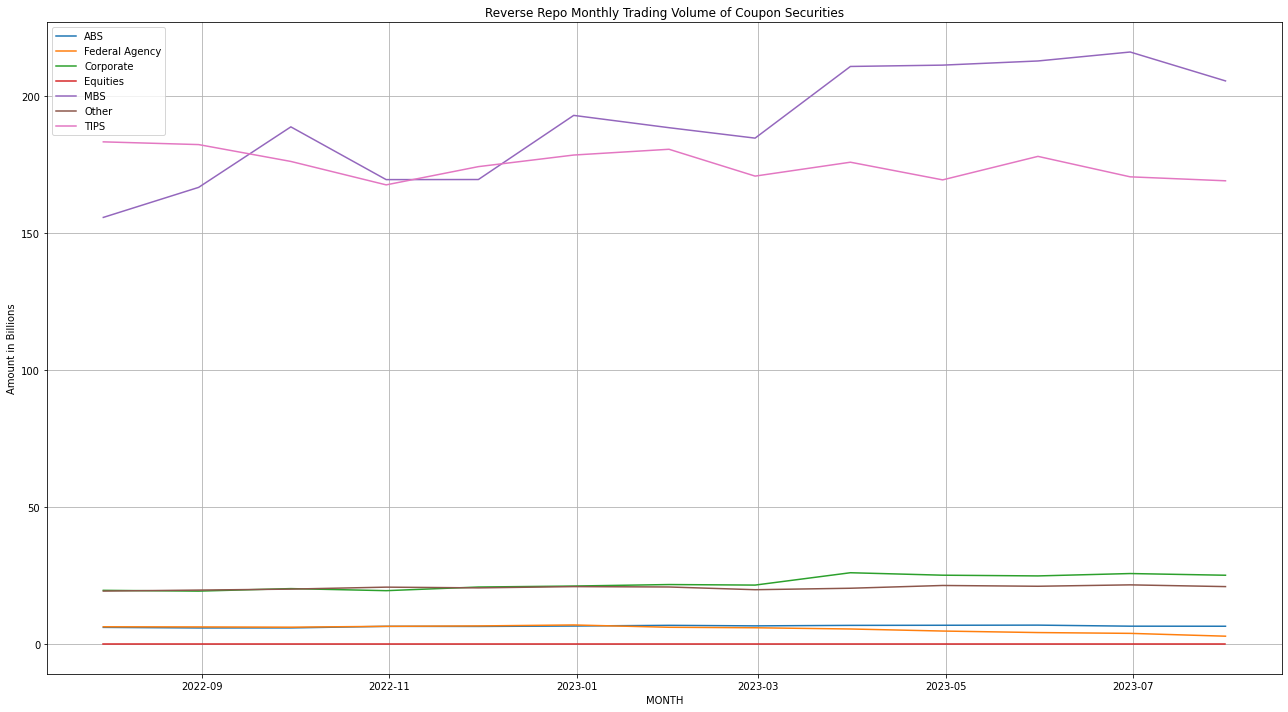

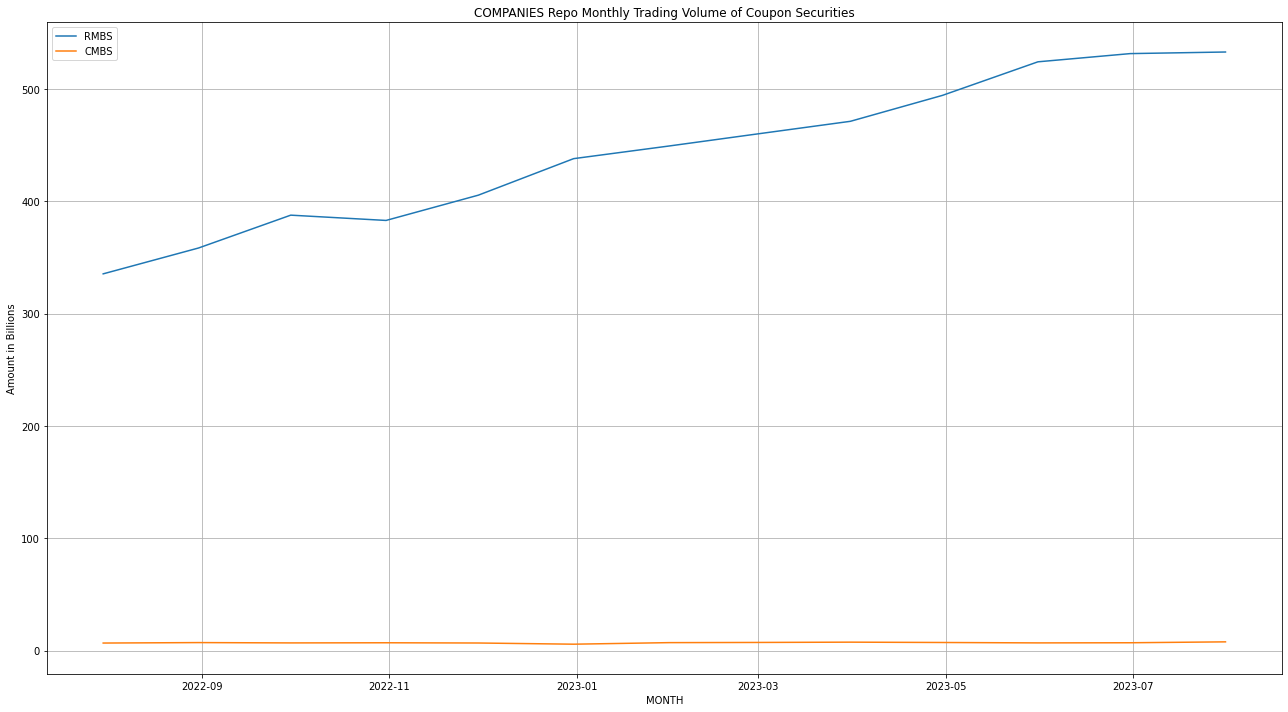

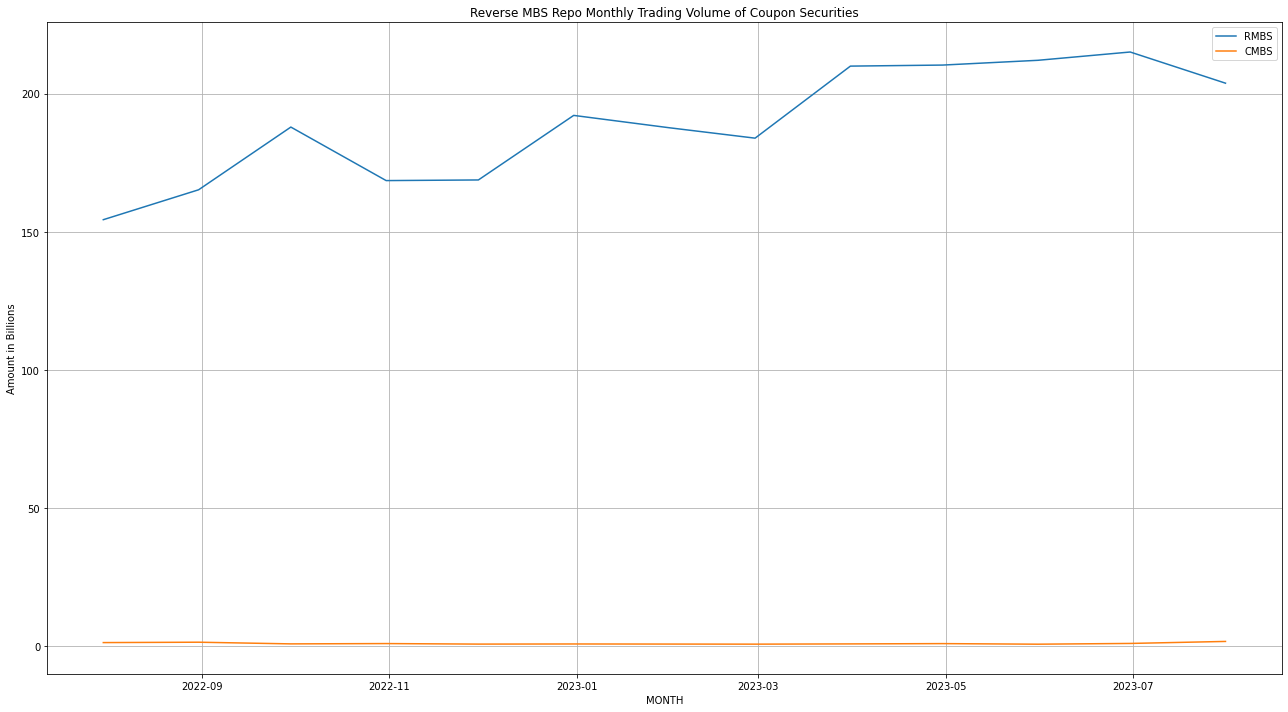

In [7]:
repo = process(path, "Primary Dealer", 7,17)
repo_monthly = repo.iloc[25:,10:]
repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"COMPANIES Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

repo_mbs = process(path, "Primary Dealer", 7,29)
mbs_repo_monthly = repo_mbs.iloc[25:,22:]
# repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(mbs_repo_monthly,"Reverse Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

repo = process(path, "Primary Dealer", 7,21)
repo_monthly = repo.iloc[25:,19:]
# repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(repo_monthly,"COMPANIES Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")



reverse_repo = process(path, "Primary Dealer", 7,33)
rev_repo_monthly = reverse_repo.iloc[25:,31:]
# rev_repo_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(rev_repo_monthly,"Reverse MBS Repo Monthly Trading Volume of Coupon Securities","MONTH","Amount in Billions")

US EQUITY ISSUANCE AND TRADING VOLUMES

In [8]:
path = "sifma/US-Equities-and-Related-Statistics-SIFMA.xlsx"

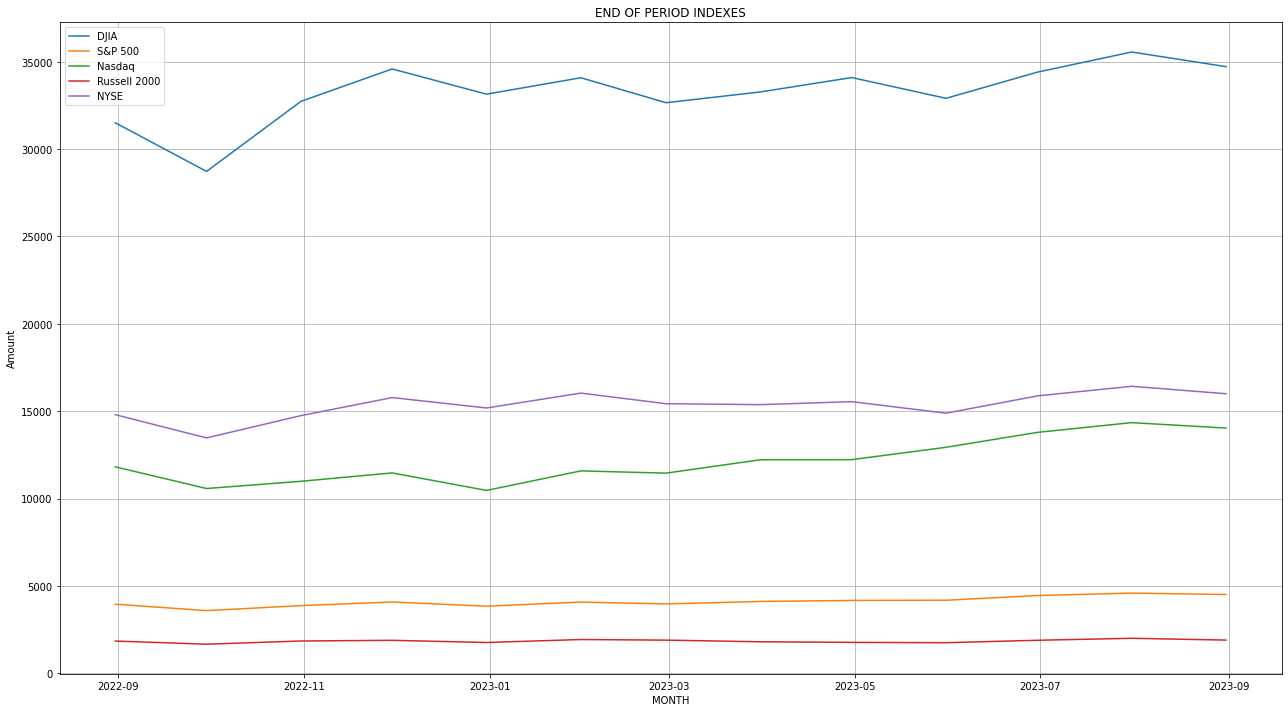

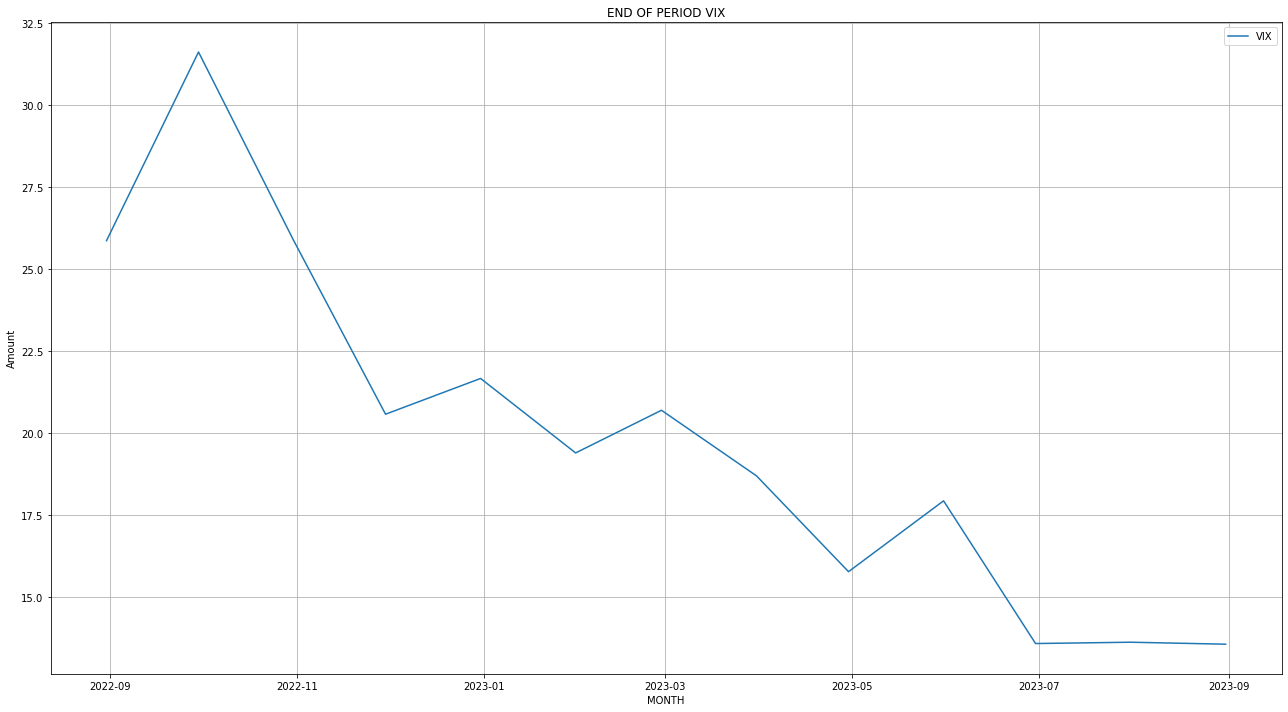

In [9]:
EOP = process(path, "Indexes & Volatility", 7,5)
EOP_monthly = EOP.iloc[25:]

plt.figure(figsize=(18, 10))
plot_dataframe(EOP_monthly,"END OF PERIOD INDEXES","MONTH","Amount")

eop_vix = process(path, "Indexes & Volatility", 7,6)
eop_vix = eop_vix.iloc[25:, 5:]
# eop_vix
plt.figure(figsize=(18, 10))
plot_dataframe(eop_vix,"END OF PERIOD VIX","MONTH","Amount")


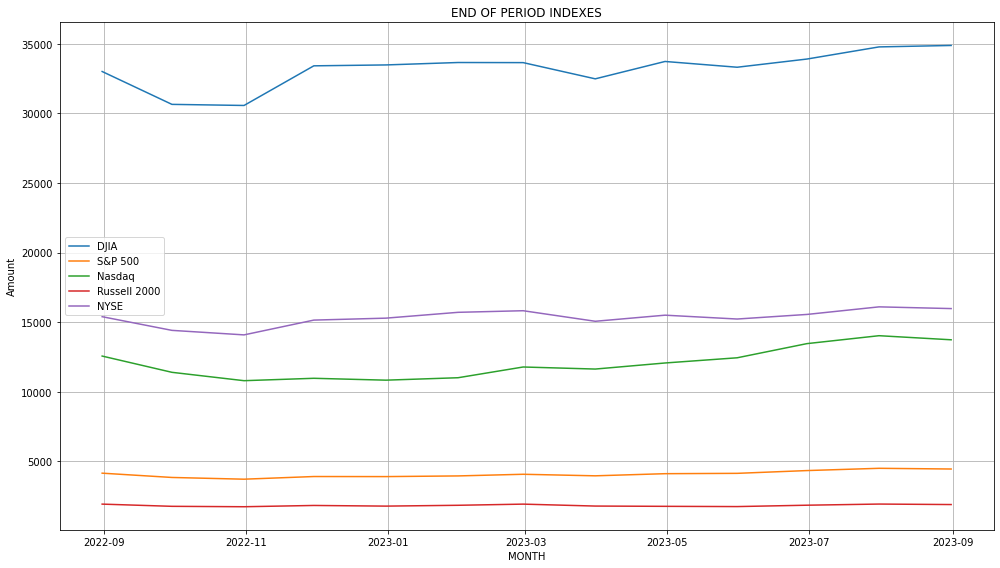

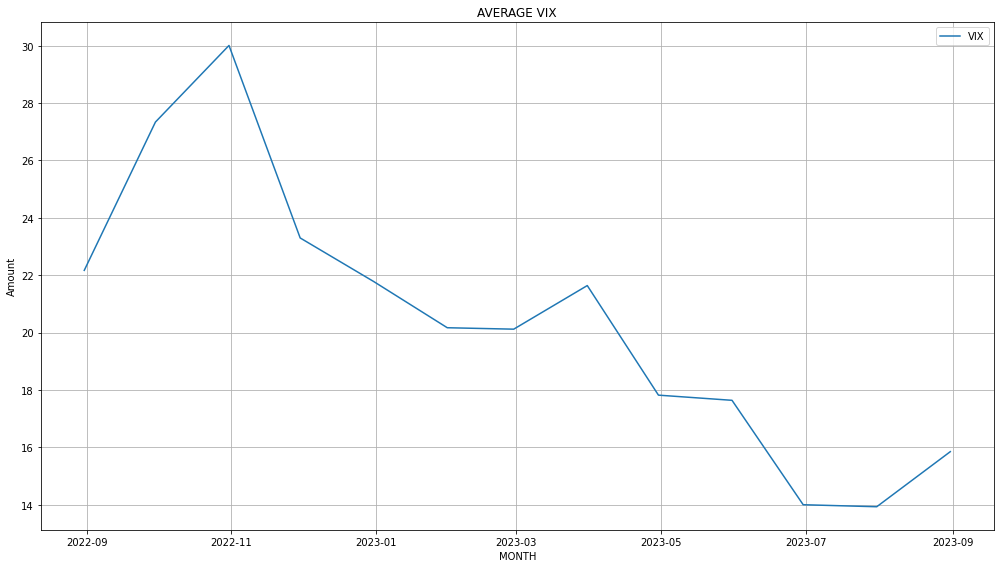

In [10]:
ave = process(path, "Indexes & Volatility", 7,12)
ave_monthly = ave.iloc[25:,7:]
ave_monthly
plt.figure(figsize=(14, 8))
plot_dataframe(ave_monthly,"END OF PERIOD INDEXES","MONTH","Amount")


ave_vix = process(path, "Indexes & Volatility", 7,13)
ave_vix = ave_vix.iloc[25:, 12:]
# eop_vix
plt.figure(figsize=(14, 8))
plot_dataframe(ave_vix,"AVERAGE VIX","MONTH","Amount")

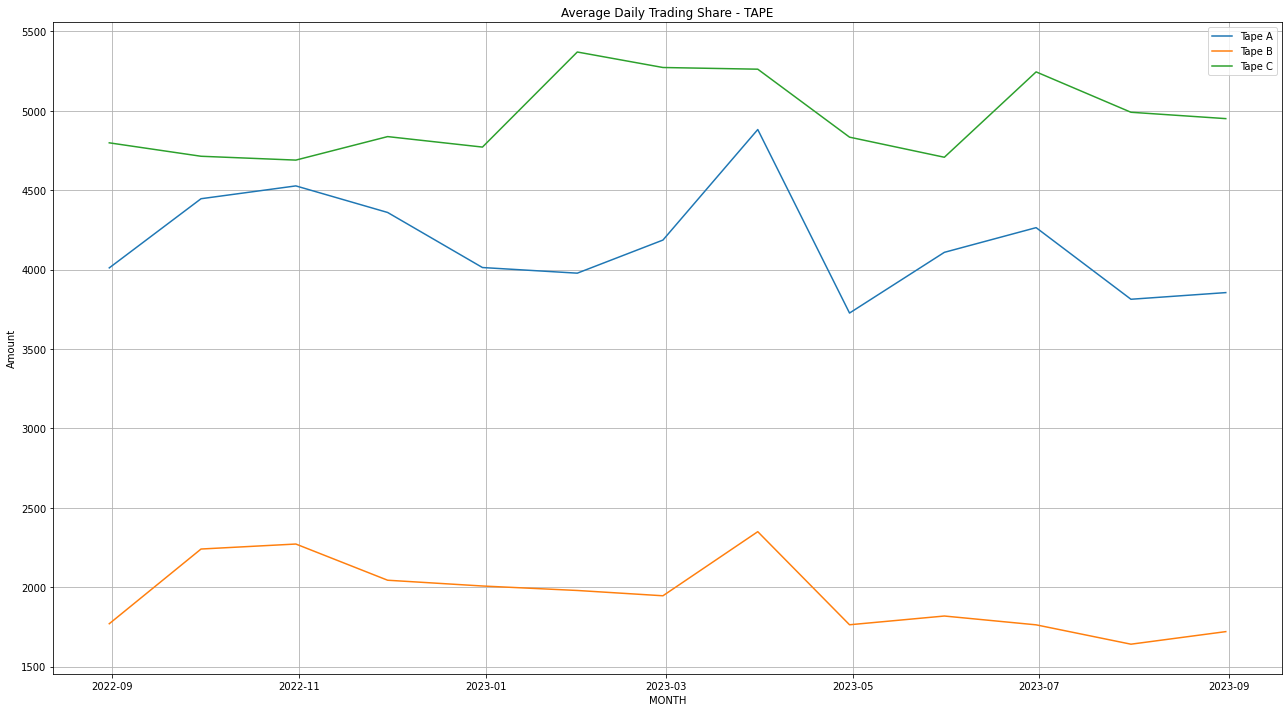

In [11]:
tape_volume = process(path, "ADV #", 7,3)
tape_volume_monthly = tape_volume.iloc[25:]
# tape_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(tape_volume_monthly,"Average Daily Trading Share - TAPE","MONTH","Amount")

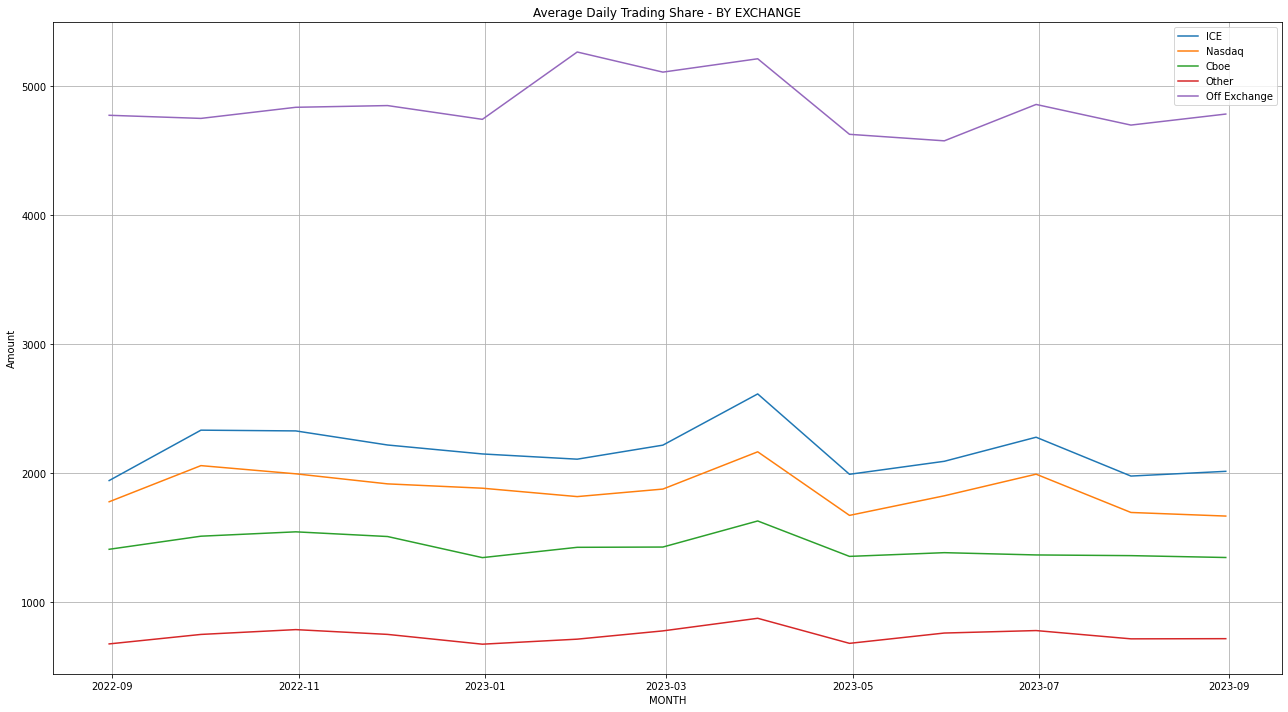

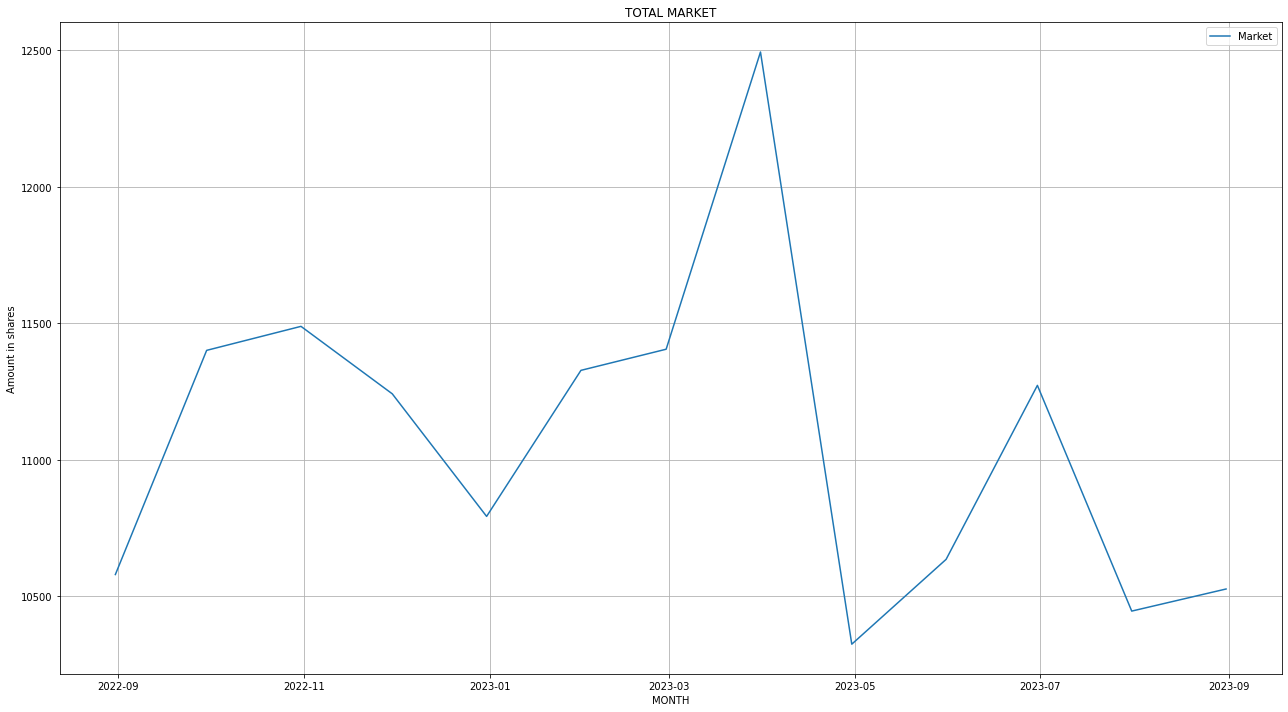

In [12]:
exchange = process(path, "ADV #", 7,9)
exchange_volume_monthly = exchange.iloc[25:,4:]
# exchange_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(exchange_volume_monthly,"Average Daily Trading Share - BY EXCHANGE","MONTH","Amount")

total = process(path, "ADV #", 7,11)
total_monthly = total.iloc[25:,10:]
# exchange_volume_monthly
plt.figure(figsize=(18, 10))
plot_dataframe(total_monthly,"TOTAL MARKET","MONTH","Amount in shares")

In [13]:

# issuance = process(path, "Issuance", 6,7)
# agency_debt_issuance_month = issuance[25:]
# agency_debt_issuance_year = issuance.head(11)
# plt.figure(figsize=(18, 10))
# plot_dataframe(agency_debt_issuance_month,"ISSUANCE","MONTH","Amount in Billions")

# trading_volume = process(path, "Trading Volume" ,6,5 )
# plt.figure(figsize=(18, 10))
# plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

# outstanding = process(path, "Outstanding" ,6,17 )
# display(outstanding.head(11))

In [30]:
path = "sifma/US-Asset-Backed-Securities-Statistics-SIFMA.xlsx"

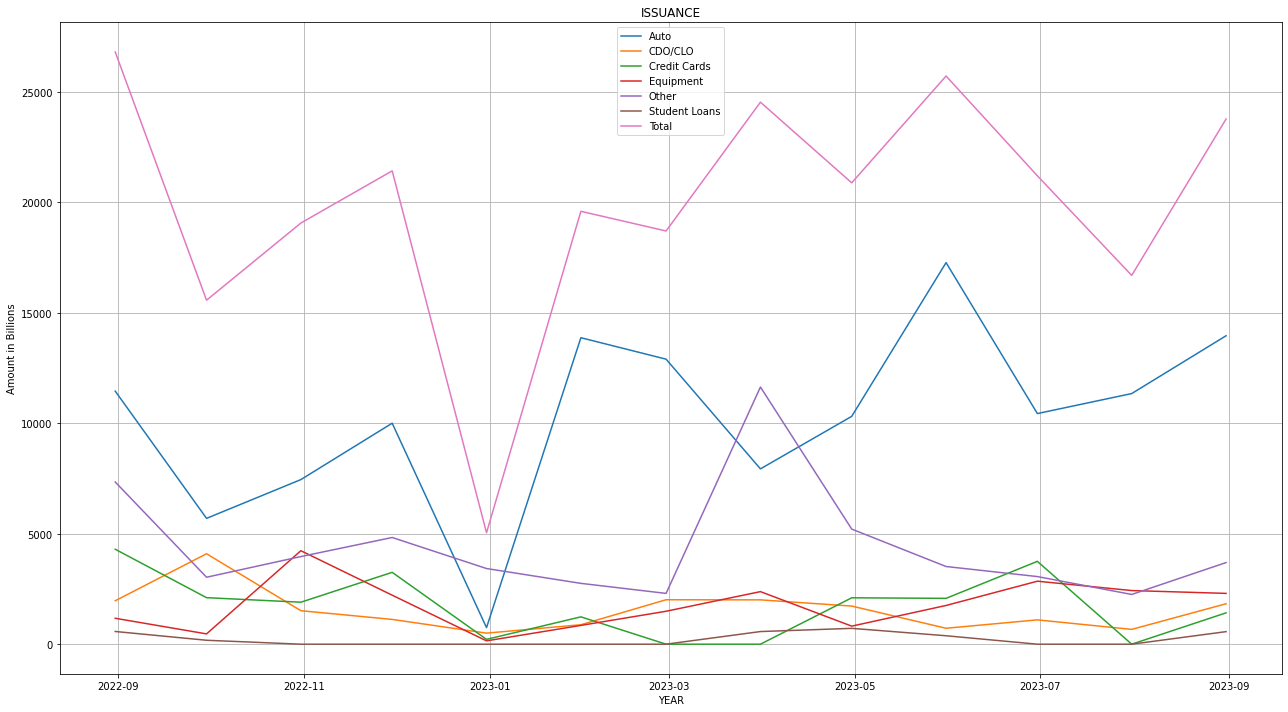

In [37]:
abs_issuance = process(path, "ABS Issuance", 9,7)
abs_issuance = abs_issuance.iloc[25:,]
# display(abs_issuance)
plt.figure(figsize=(18, 10))
plot_dataframe(abs_issuance,"ISSUANCE","YEAR","Amount in Billions")

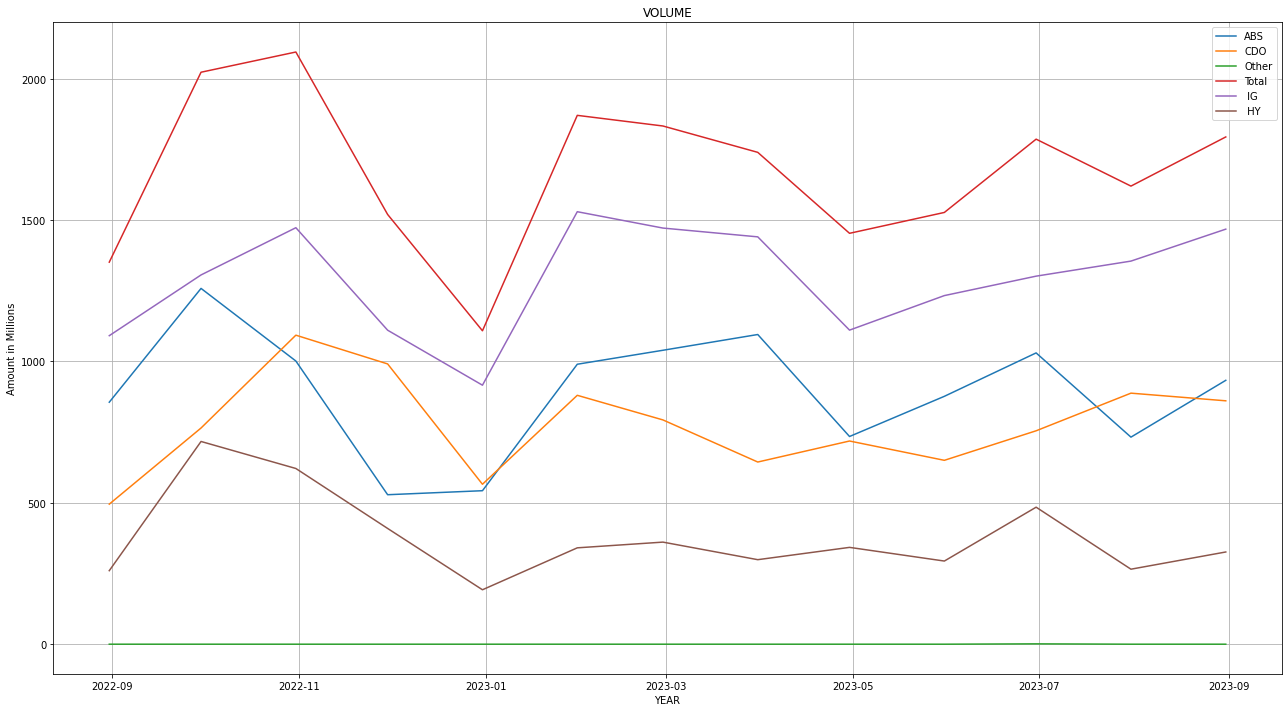

In [47]:
abs_trading_volume = process(path, "ABS Trading Volume - $", 6,6)
abs_trading_volume = abs_trading_volume.iloc[25:,]
# abs_trading_volume.head(13)
# display(abs_issuance)
plt.figure(figsize=(18, 10))
plot_dataframe(abs_trading_volume.head(13),"VOLUME","YEAR","Amount in Millions")

In [16]:
# abs_issuance = process(path, "ABS Issuance",9 ,7)
# display(abs_issuance.head(11))
# plt.figure(figsize=(18, 10))
# plot_dataframe(abs_issuance.head(11),"ABS ISSUANCE","YEAR","Amount in Billions")

In [22]:
# trading_volume = process(path, "Trading Volume" ,6,5 )
# plt.figure(figsize=(18, 10))
# plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

In [23]:
path = "sifma/US-Corporate-Bonds-Statistics-SIFMA.xlsx"

,Investment Grade,High Yield,Total,NaN,Callable,Non-Callable
2012,1040.4191,332.6721,1373.0912,NaN,921.04,452.0511
2013,1051.4864,332.2069,1383.6933,NaN,850.8905,532.8026
2014,1127.0879,314.9143,1442.0022,NaN,938.3531,503.6491
2015,1233.7467,259.1995,1492.9462,NaN,1066.6999,426.2462
2016,1288.9133,236.5413,1525.4546,NaN,1114.4065,411.0478
2017,1364.3412,283.4477,1647.7889,NaN,1229.2953,418.4941
2018,1163.7861,171.9053,1335.6914,NaN,995.6729,340.0182
2019,1138.4948,278.0756,1416.5704,NaN,1150.3663,266.2043
2020,1849.6135,423.5017,2273.1152,NaN,2002.6117,270.5036
2021,1474.1349,486.669,1960.8039,NaN,1703.2296,257.5744


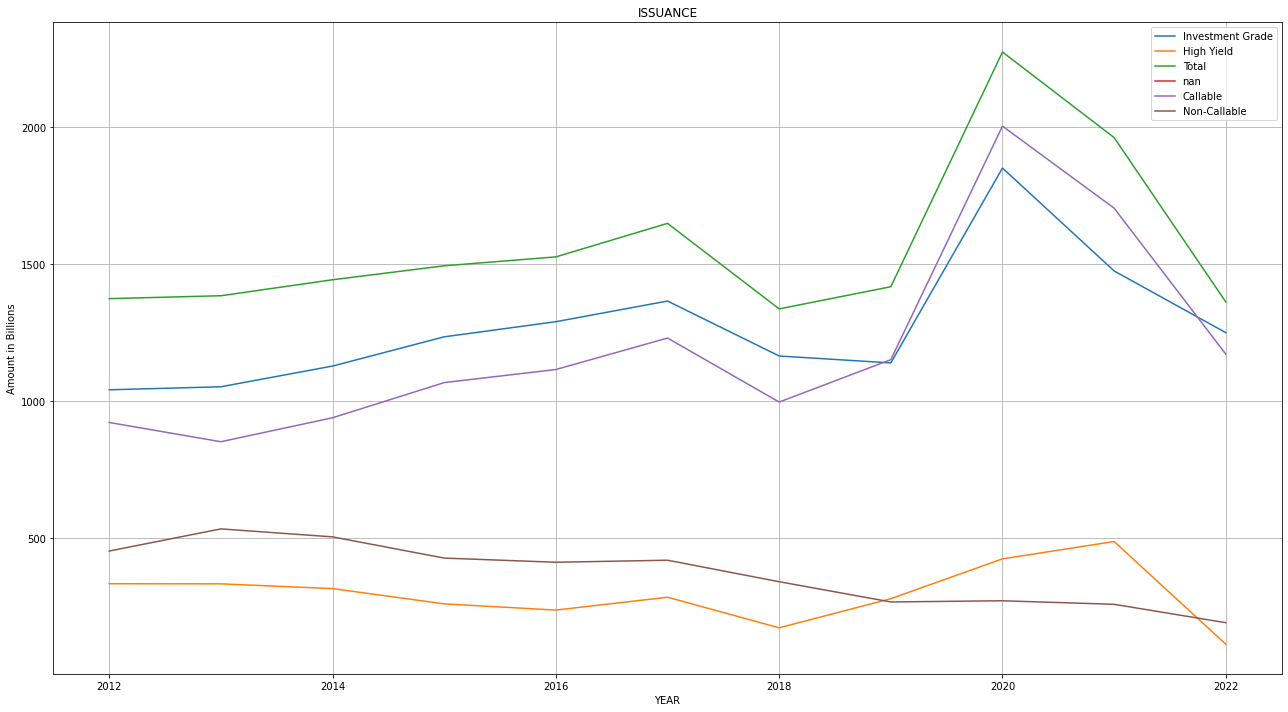

In [28]:
issuance = process(path, "Issuance", 7,6)
display(issuance.head(10))
plt.figure(figsize=(18, 10))
plot_dataframe(issuance.head(11),"ISSUANCE","YEAR","Amount in Billions")

# trading_volume = process(path, "Trading Volume" ,7,7 )
# plt.figure(figsize=(18, 10))
# plot_dataframe(trading_volume.head(11),"Trading Volume","YEAR","Amount in Billions")

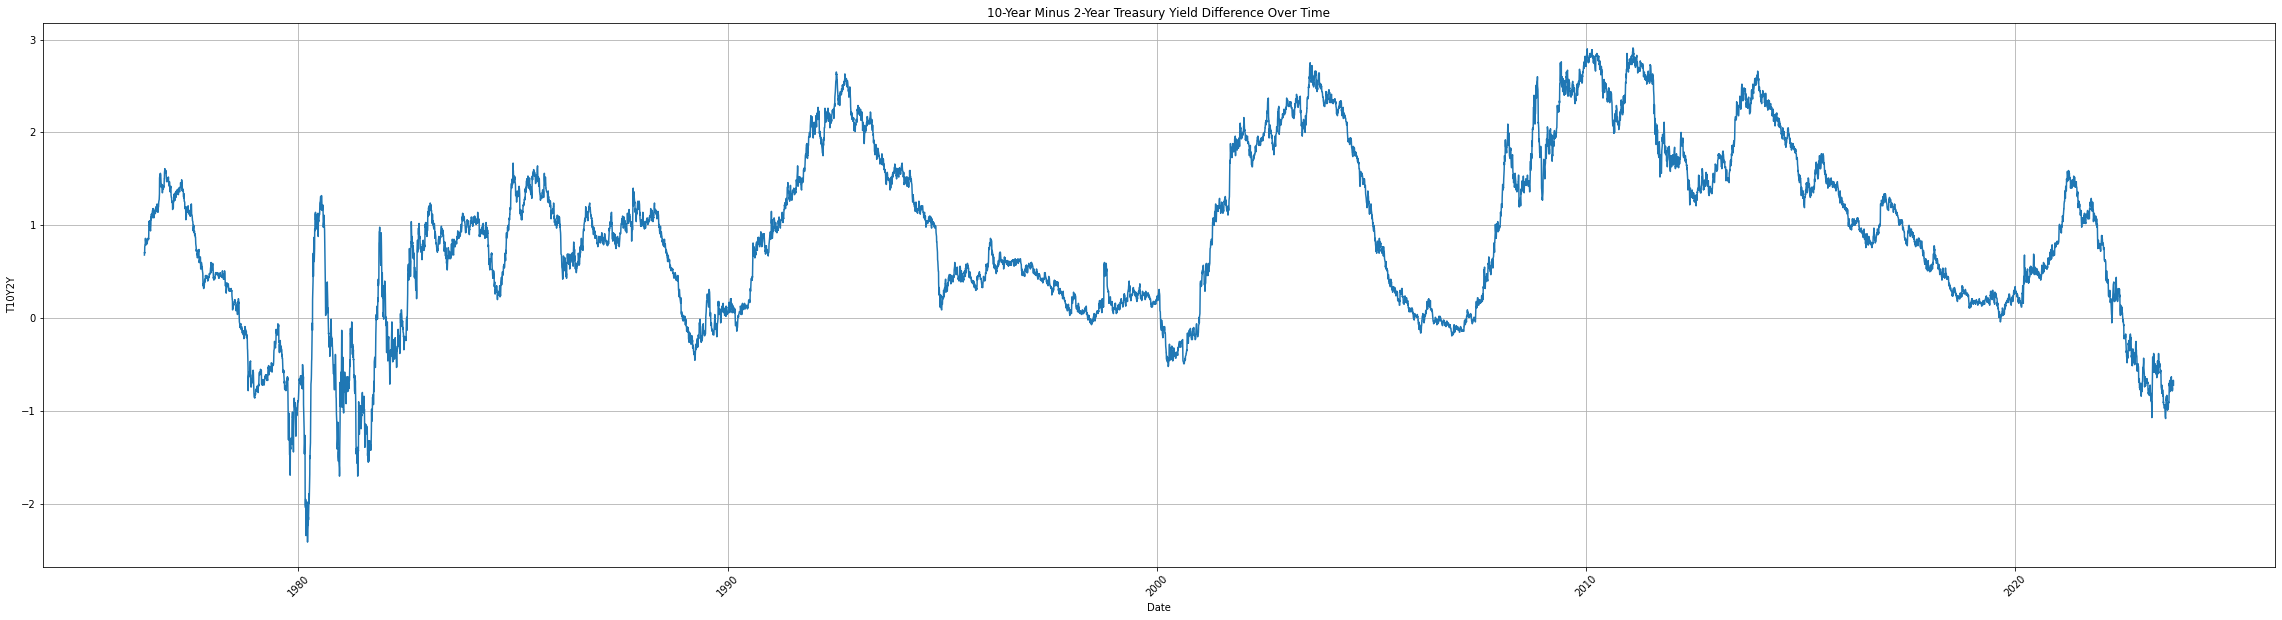

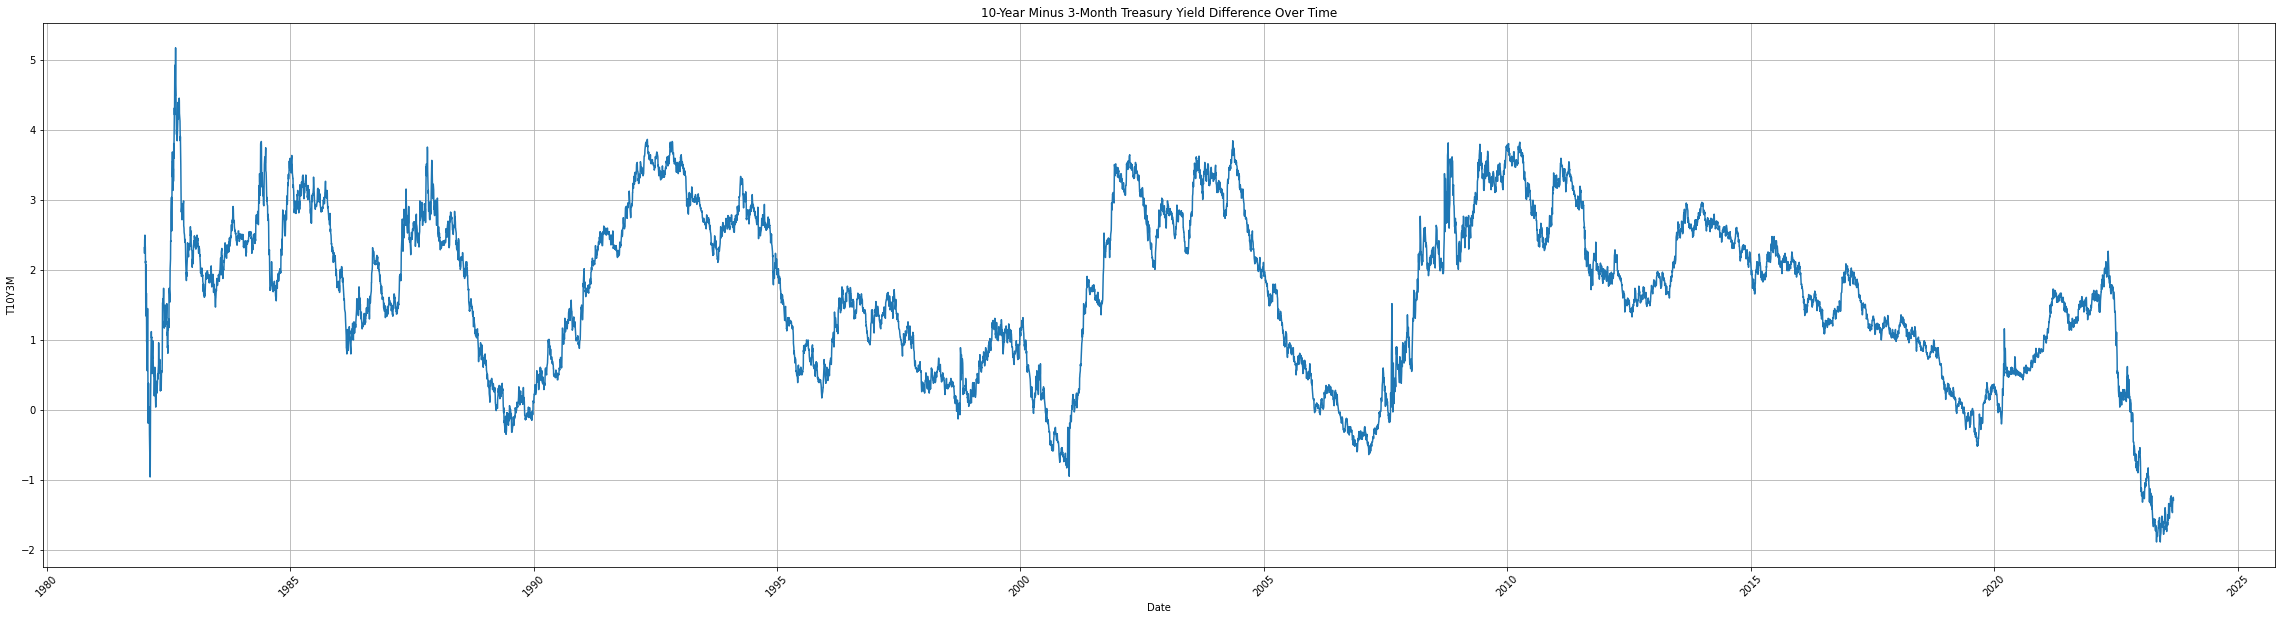

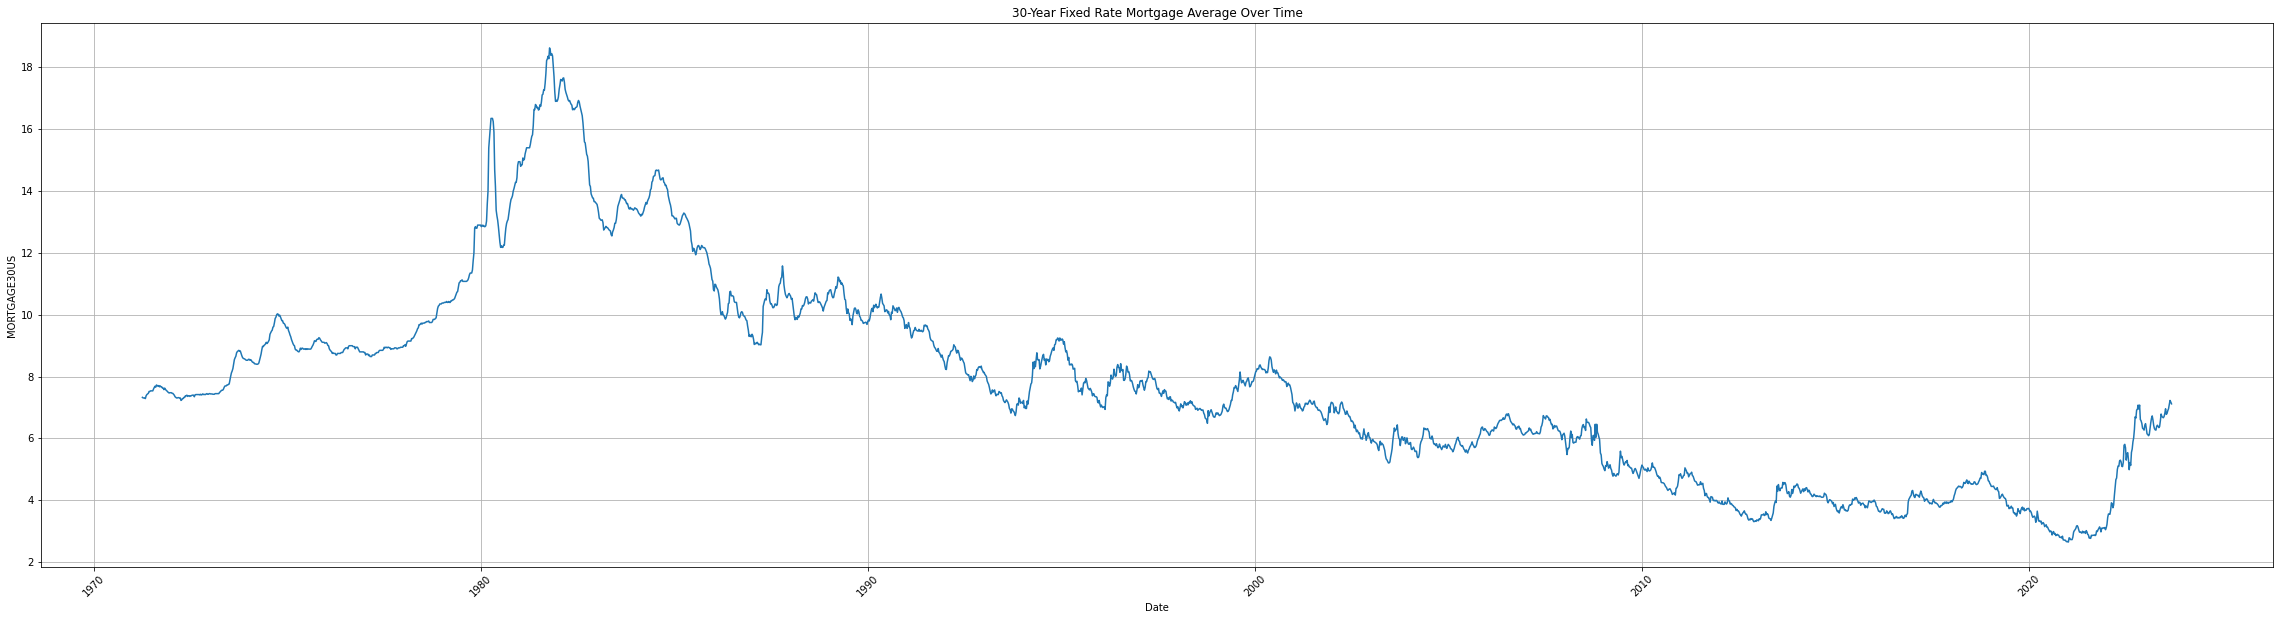

In [29]:
path = "fred/T10Y2Y.xls"
t10y2y = process(path, "FRED Graph", 9,2)
t10y2y = t10y2y[t10y2y['T10Y2Y'] != 0]
# display(t10y2y.head(50))
plt.figure(figsize=(40, 10))
plt.plot(t10y2y.index, t10y2y['T10Y2Y'])
plt.xlabel('Date')
plt.ylabel('T10Y2Y')
plt.title('10-Year Minus 2-Year Treasury Yield Difference Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

path = "fred/T10Y3M.xls"
t10y3m = process(path, "FRED Graph",9,2)
t10y3m = t10y3m[t10y3m['T10Y3M'] != 0]
plt.figure(figsize=(40, 10))
plt.plot(t10y3m.index, t10y3m['T10Y3M'])
plt.xlabel('Date')
plt.ylabel('T10Y3M')
plt.title('10-Year Minus 3-Month Treasury Yield Difference Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

path = "fred/MORTGAGE30US.xls"
mortgage30us = process(path, "FRED Graph",9,2)
# display(mortgage30us.head(10))
plt.figure(figsize=(40, 10))
plt.plot(mortgage30us.index, mortgage30us['MORTGAGE30US'])
plt.xlabel('Date')
plt.ylabel('MORTGAGE30US')
plt.title('30-Year Fixed Rate Mortgage Average Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
